### 1.

A partir del dataset mnist (tf.keras.datasets.cifar10.load_data()), realiza una clasificación usando:

** Las imágenes son a color, es decir, tienen 3 dimensiones (rgb). Para este problema, antes de empezar, transforma las imágenes a blanco y negro para que tengan 1 sola dimensión de profundidad **. 

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

2. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

¿ Cuál ha dado mejor resultado?

## El mejor resultado, curiosamente, lo da el modelo con menos capas (al añadir la Dense de 16 neuronas se pierde accuracy)

Para compilar el modelo, usa:

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
cifar = datasets.cifar10.load_data()

In [3]:
(train_images, train_labels), (test_images, test_labels) = cifar

In [4]:
train_images = tf.image.rgb_to_grayscale(train_images)

In [5]:
test_images = tf.image.rgb_to_grayscale(test_images)

In [6]:
train_images = tf.cast(train_images, tf.float32)
test_images = tf.cast(test_images, tf.float32)

In [7]:
train_images = train_images/255.0
test_images = test_images/255.0

In [8]:
train_images.shape    # we have 50000 images, shaped 32 x 32, in 1 color(grayscale)

TensorShape([50000, 32, 32, 1])

In [9]:
test_images.shape

TensorShape([10000, 32, 32, 1])

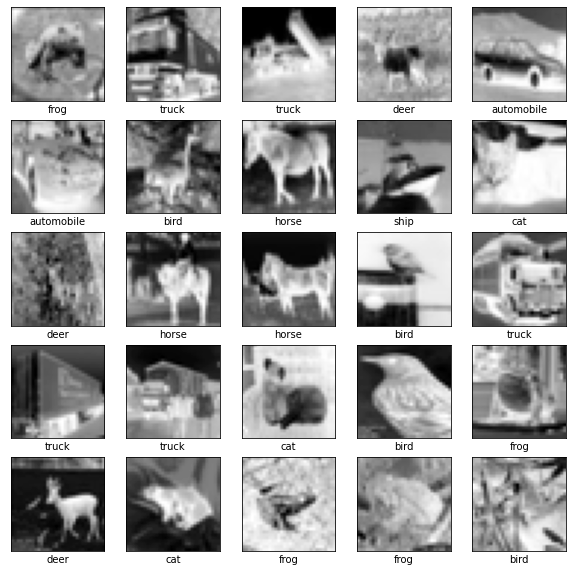

In [10]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

- 1 capa convolutiva con 8 neuronas
- 1 MaxPool quedando las dimensiones de la imagen a la mitad
- 1 dropout 0.25
- 1 Flatten
- 1 dense con 32 neuronas
- 1 dense con 10 (salida)

In [11]:
model = models.Sequential([
        layers.Conv2D(filters=8,
                        kernel_size=(4, 4),
                        input_shape=(32, 32, 1),
                        padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2), 
                              padding="same"),                
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(32, activation='relu'),
        layers.Dense(10, activation='softmax'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 8)         136       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                65568     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 66,034
Trainable params: 66,034
Non-trainable params: 0
____________________________________________________

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.1055 - accuracy: 0.2126
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6235 - accuracy: 0.4250
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5069 - accuracy: 0.4672
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4386 - accuracy: 0.4965
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3792 - accuracy: 0.5145
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3416 - accuracy: 0.5339
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3033 - accuracy: 0.5482
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2687 - accuracy: 0.5562
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2400 - accuracy: 0.5700
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.206

- 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

In [14]:
model2 = models.Sequential([
        layers.Conv2D(filters=8,
                        kernel_size=(4, 4),
                        input_shape=(32, 32, 1),
                        padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(16, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(10, activation='softmax'),
])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 8)         136       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                32784     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [15]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model2.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 2.0591 - accuracy: 0.2337
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7040 - accuracy: 0.3924
Epoch 3/10
1563/1563 [==============================] - 5s 4ms/step - loss: 1.5750 - accuracy: 0.4396
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4769 - accuracy: 0.4776
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4207 - accuracy: 0.5011
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3792 - accuracy: 0.5144
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3391 - accuracy: 0.5308
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2911 - accuracy: 0.5464
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2612 - accuracy: 0.5573
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.260

In [17]:
(train_images_color, train_labels_color), (test_images_color, test_labels_color) = cifar

In [18]:
train_images_color = train_images_color/255.0
test_images_color = test_images_color/255.0

### 2.

**BONUS: Entrena la red neuronal 1 pero esta vez con las imágenes a color.**

In [19]:
model_color = models.Sequential([
        layers.Conv2D(filters=8,
                        kernel_size=(4, 4),
                        input_shape=(32, 32, 1),
                        padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2), 
                              padding="same"),                
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(32, activation='relu'),
        layers.Dense(10, activation='softmax'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 8)         136       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                65568     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 66,034
Trainable params: 66,034
Non-trainable params: 0
____________________________________________________

In [20]:
model_color.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
model_color.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 6s 3ms/step - loss: 2.0155 - accuracy: 0.2739
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6132 - accuracy: 0.4344
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5104 - accuracy: 0.4687
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4358 - accuracy: 0.4998
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3784 - accuracy: 0.5166
Epoch 6/10
1563/1563 [==============================] - 5s 4ms/step - loss: 1.3383 - accuracy: 0.5330
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3066 - accuracy: 0.5439
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2698 - accuracy: 0.5569
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2457 - accuracy: 0.5598
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.210